In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline

<b>Get the Clean Data

In [2]:
df = pd.read_csv('cleaned_data.csv')

In [3]:
df.head(10)

Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   51        No      Travel_Rarely                   Sales                 6   
1   31       Yes  Travel_Frequently  Research & Development                10   
2   32        No  Travel_Frequently  Research & Development                17   
3   38        No         Non-Travel  Research & Development                 2   
4   32        No      Travel_Rarely  Research & Development                10   
5   46        No      Travel_Rarely  Research & Development                 8   
6   28       Yes      Travel_Rarely  Research & Development                11   
7   29        No      Travel_Rarely  Research & Development                18   
8   31        No      Travel_Rarely  Research & Development                 1   
9   25        No         Non-Travel  Research & Development                 7   

       Education EducationField  Gender  JobLevel                    JobRole  \
0        College  Life Sciences  Female         1  Healthcare Representative   
1  Below College  Life Sciences  Female         1         Research Scientist   
2         Master          Other    Male         4            Sales Executive   
3         Doctor  Life Sciences    Male         3            Human Resources   
4  Below College        Medical    Male         1            Sales Executive   
5       Bachelor  Life Sciences  Female         4          Research Director   
6        College        Medical    Male         2            Sales Executive   
7       Bachelor  Life Sciences    Male         2            Sales Executive   
8       Bachelor  Life Sciences    Male         3      Laboratory Technician   
9         Master        Medical  Female         4      Laboratory Technician   

   ... TrainingTimesLastYear  YearsAtCompany  YearsSinceLastPromotion  \
0  ...                     6               1                        0   
1  ...                     3               5                        1   
2  ...                     2               5                        0   
3  ...                     5               8                        7   
4  ...                     2               6                        0   
5  ...                     5               7                        7   
6  ...                     2               0                        0   
7  ...                     2               0                        0   
8  ...                     2               9                        7   
9  ...                     2               6                        1   

   YearsWithCurrManager  Absence  EnvironmentSatisfaction  JobSatisfaction  \
0                     0       17                      3.0              4.0   
1                     4       13                      3.0              2.0   
2                     3        7                      2.0              2.0   
3                     5       14                      4.0              4.0   
4                     4        4                      4.0              1.0   
5                     7       12                      3.0              2.0   
6                     0       17                      1.0              3.0   
7                     0        6                      1.0              2.0   
8                     8       19                      2.0              4.0   
9                     5       15                      2.0              1.0   

   WorkLifeBalance  JobInvolvement  PerformanceRating  
0              2.0             3.0                3.0  
1              4.0             2.0                4.0  
2              1.0             3.0                3.0  
3              3.0             2.0                3.0  
4              3.0             3.0                3.0  
5              2.0             3.0                3.0  
6              1.0             3.0                4.0  
7              3.0             3.0                4.0  
8              3.0             3.0                4.0  
9      

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   object 
 6   EducationField           4410 non-null   object 
 7   Gender                   4410 non-null   object 
 8   JobLevel                 4410 non-null   int64  
 9   JobRole                  4410 non-null   object 
 10  MaritalStatus            4410 non-null   object 
 11  MonthlyIncome            4410 non-null   int64  
 12  NumCompaniesWorked       4410 non-null   float64
 13  PercentSalaryHike        4410 non-null   int64  
 14  StockOptionLevel        

as the data is clean and not contains any NaN value, we can start the EDA
what we will explore is :
- feature data distribution
- normality of the data distribution
- correlation analysis

#### Categorical Columns Distribution

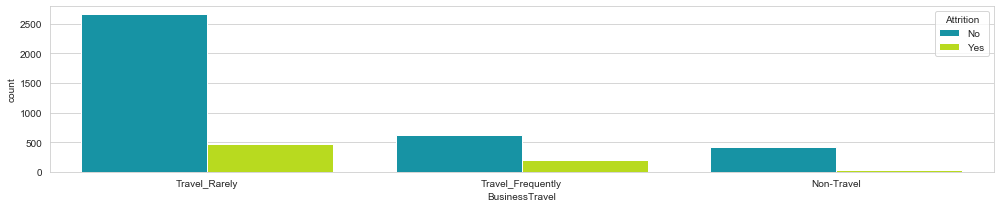

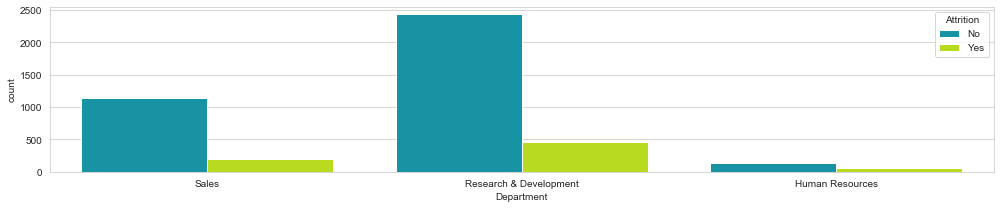

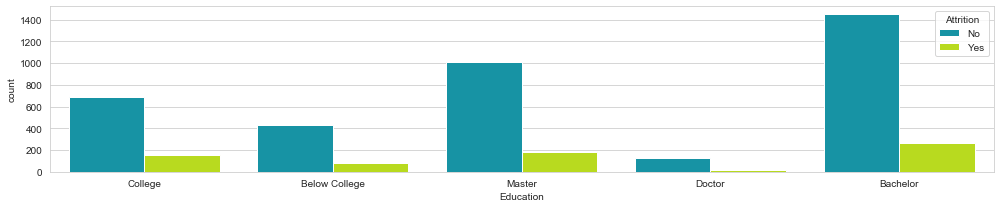

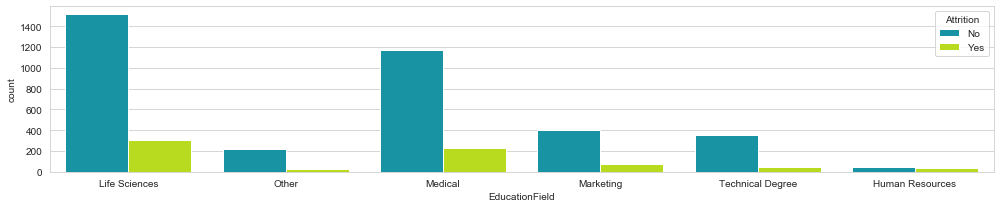

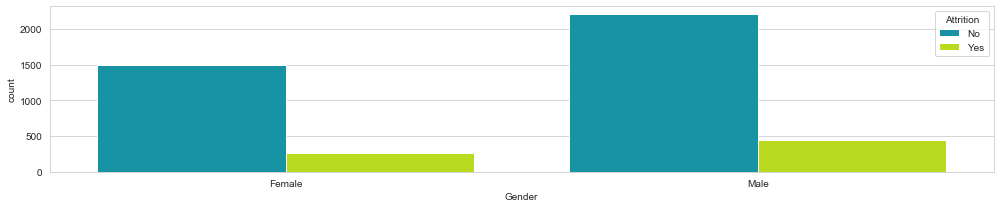

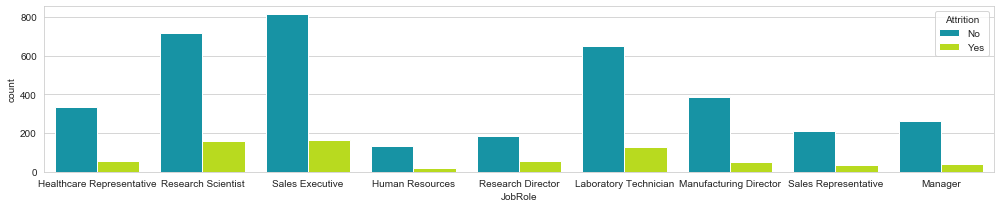

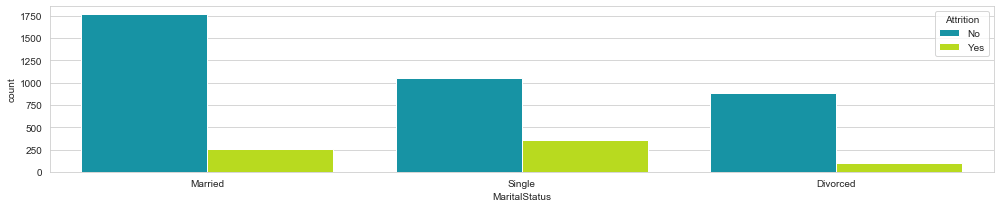

In [5]:
object_columns = df.drop('Attrition',axis=1).select_dtypes(include='object').columns
for item in object_columns:
    plt.figure(figsize=(14,3))
    sns.countplot(df[item], hue=df['Attrition'], palette='nipy_spectral')
    plt.tight_layout()
    plt.show()

<b> Not all the numeric columns is literally a numerical values, some of it are categorical number value or numerical scoring, e.g : Job Level, and the latter 5 columns which is a scoring number. or symbol, so, I manually selected the columns that will be visualized.

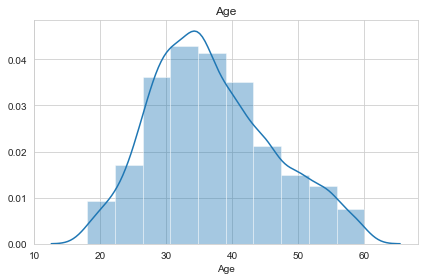

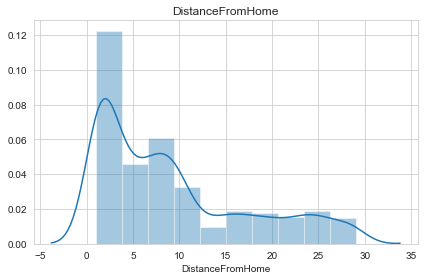

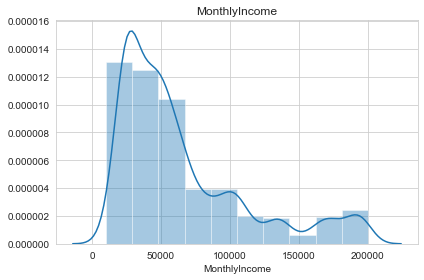

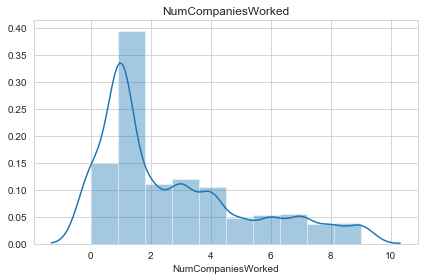

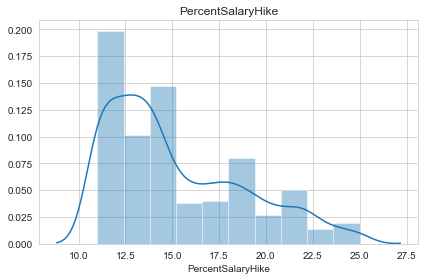

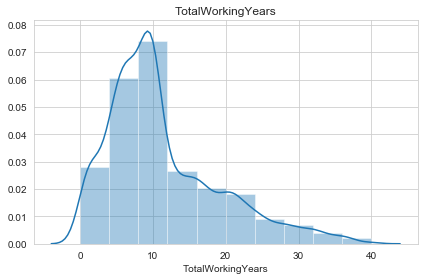

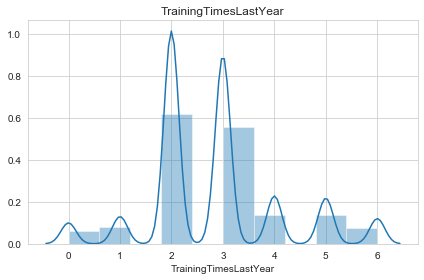

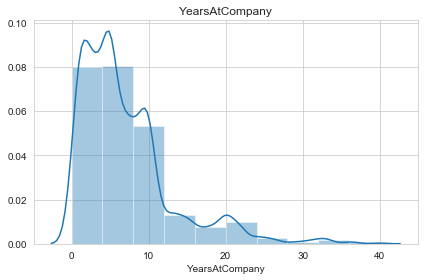

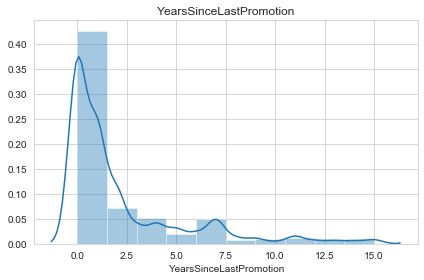

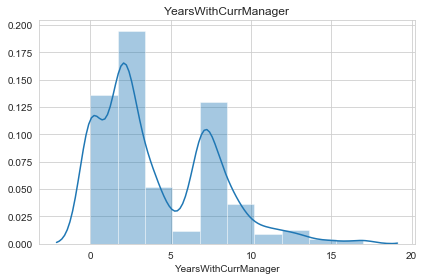

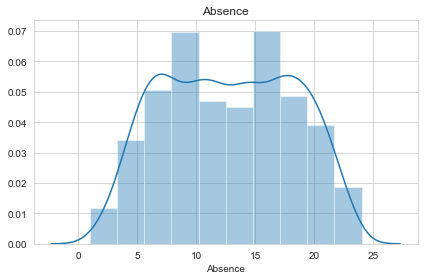

In [6]:
num_columns = ['Age','DistanceFromHome','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike', 'TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsSinceLastPromotion','YearsWithCurrManager','Absence']
for item in num_columns:
    sns.distplot(df[item], bins=10)
    plt.title(item)
    plt.tight_layout()
    plt.show()

From the plot it's seems that most numerical data is not normally distributed as the curve did not form a bell-curve.

It's means that central tendency(mean, median) values are not truly representative to the data.

#### Composition of Review Features

In [7]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Absence', 'EnvironmentSatisfaction',
       'JobSatisfaction', 'WorkLifeBalance', 'JobInvolvement',
       'PerformanceRating'],
      dtype='object')

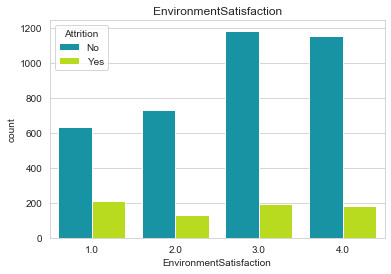

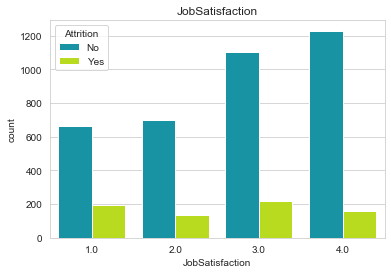

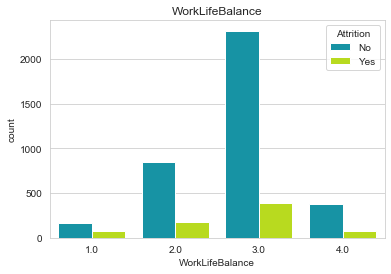

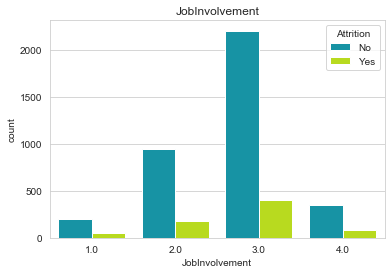

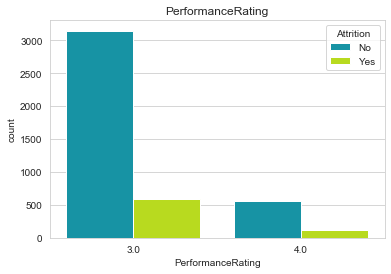

In [8]:
review = ['EnvironmentSatisfaction','JobSatisfaction', 'WorkLifeBalance', 'JobInvolvement','PerformanceRating']

for i in review:
    sns.countplot(df[i], palette='nipy_spectral', hue=df['Attrition'])
    plt.title(i)
    plt.show()

These plots are not showing significant effect 'review score' columns to attrition, just in EnvironmentSatisfaction that show the highest attrition correlate with low satisfaction.

<b>Distribution of Monthly Income and Employee Working Years at Company, displayed in hue to categorical columns.

In [9]:
import plotly.express as px

In [10]:
categorical_columns = df.select_dtypes(include='O').columns
for i in categorical_columns:
    fig = px.scatter(df, x='MonthlyIncome', y='YearsAtCompany', color=i)
    fig.show()

the scatter plot show that the attrition mostly happen in employee with income between $ 10k - 50k a year, and under 10 years of working at the company. 

#### Check Outlier in 'MonthlyIncome' and 'YearsAtCompany' column.

In [11]:
df['MonthlyIncome'].describe()

count      4410.000000
mean      65029.312925
std       47068.888559
min       10090.000000
25%       29110.000000
50%       49190.000000
75%       83800.000000
max      199990.000000
Name: MonthlyIncome, dtype: float64

In [12]:
df['YearsAtCompany'].describe()

count    4410.000000
mean        7.008163
std         6.125135
min         0.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        40.000000
Name: YearsAtCompany, dtype: float64

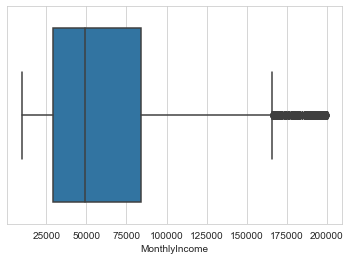

In [13]:
sns.boxplot(df['MonthlyIncome'])

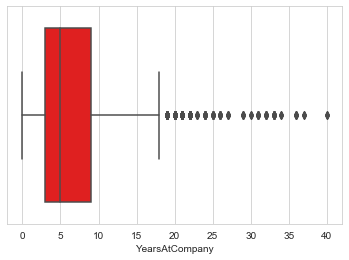

In [14]:
sns.boxplot(df['YearsAtCompany'], color='red')

### Test Distribution Normality of Numerical Features.
As we know from the numerical columns distribution plot, the data is not normally distirbuted, but I decided to take Anderson test to some of the features. I assumed some features would be very influential to the predictions with ML models, so i choose four examples.

In [15]:
test = ['DistanceFromHome','MonthlyIncome','TotalWorkingYears','YearsAtCompany']

In [16]:
from scipy.stats import anderson

In [17]:
def try_normal(data):
    result = {'Anderson' : {i:j for i,j in zip(anderson(data)[2],anderson(data)[1])}}
    result['Anderson']['stat'] = anderson(data)[0]
    return result

In [18]:
for item in test:
    print(try_normal(df[item]))

{'Anderson': {15.0: 0.575, 10.0: 0.655, 5.0: 0.786, 2.5: 0.917, 1.0: 1.091, 'stat': 204.9940405083198}}
{'Anderson': {15.0: 0.575, 10.0: 0.655, 5.0: 0.786, 2.5: 0.917, 1.0: 1.091, 'stat': 256.20018419428925}}
{'Anderson': {15.0: 0.575, 10.0: 0.655, 5.0: 0.786, 2.5: 0.917, 1.0: 1.091, 'stat': 130.29097885092597}}
{'Anderson': {15.0: 0.575, 10.0: 0.655, 5.0: 0.786, 2.5: 0.917, 1.0: 1.091, 'stat': 182.10637825814956}}


From the Anderson Test it is proved that the data is not normally distributed, the result in each significance level is far below the statistical value. 

<b> Should I remove the outlier ?</b>
- I think it not necessary to remove outlier, the main reason is that the data is not normally distributed. As shown in the boxplot graph, so many data are considered outlier, remove them means I will remove many data and make our data not representative.
- Second thing is, that the outliers may contains anomaly or unique characteristics, such as employee with 40 years at the company but have relatively below average income or employee that just joined but had a very high salary, those conditions may have some influence to our modelling.

### Correlation Analysis

In [19]:
df['Attrition'] = df['Attrition'].map({'Yes':1,'No':0})

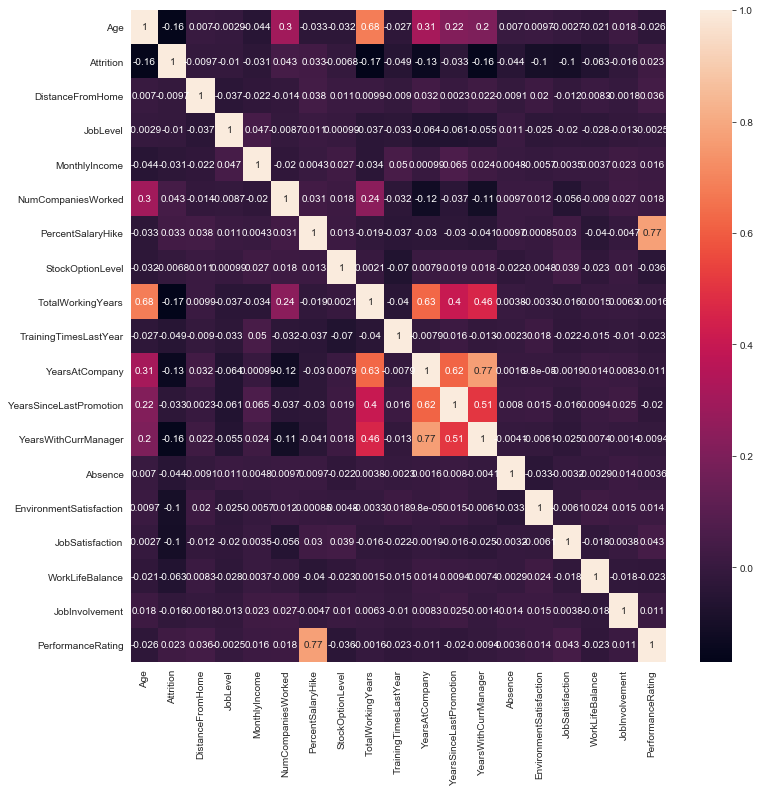

In [20]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)

<b>Top 5 Positive Correlation

In [21]:
df.corr().sort_values(by='Attrition', ascending=False).head(6)

Age  Attrition  DistanceFromHome  JobLevel  \
Attrition          -0.159205   1.000000         -0.009730 -0.010290   
NumCompaniesWorked  0.299635   0.043494         -0.013822 -0.008656   
PercentSalaryHike  -0.033137   0.032533          0.038125  0.010973   
PerformanceRating  -0.025563   0.023403          0.036418 -0.002474   
StockOptionLevel   -0.031753  -0.006839          0.011169  0.000993   
DistanceFromHome    0.006963  -0.009730          1.000000 -0.037329   

                    MonthlyIncome  NumCompaniesWorked  PercentSalaryHike  \
Attrition               -0.031176            0.043494           0.032533   
NumCompaniesWorked      -0.020315            1.000000           0.031235   
PercentSalaryHike        0.004325            0.031235           1.000000   
PerformanceRating        0.016093            0.017626           0.773550   
StockOptionLevel         0.026930            0.017922           0.012548   
DistanceFromHome        -0.021607           -0.013822           0.038125   

                    StockOptionLevel  TotalWorkingYears  \
Attrition                  -0.006839          -0.170491   
NumCompaniesWorked          0.017922           0.237863   
PercentSalaryHike           0.012548          -0.019273   
PerformanceRating          -0.036348          -0.001569   
StockOptionLevel            1.000000           0.002143   
DistanceFromHome            0.011169           0.009900   

                    TrainingTimesLastYear  YearsAtCompany  \
Attrition                       -0.049431       -0.134392   
NumCompaniesWorked              -0.032235       -0.118421   
PercentSalaryHike               -0.037392       -0.029707   
PerformanceRating               -0.022895       -0.011038   
StockOptionLevel                -0.069902        0.007886   
DistanceFromHome                -0.009001        0.031684   

                    YearsSinceLastPromotion  YearsWithCurrManager   Absence  \
Attrition                         -0.033019             -0.156199 -0.043517   
NumCompaniesWorked                -0.036814             -0.110319  0.009736   
PercentSalaryHike                 -0.029542             -0.040864  0.009710   
PerformanceRating                 -0.020159             -0.009426  0.003642   
StockOptionLevel                   0.019063              0.017757 -0.022115   
DistanceFromHome                   0.002290              0.021584 -0.009141   

                    EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance  \
Attrition                         -0.101625        -0.104017        -0.062975   
NumCompaniesWorked                 0.012346        -0.055614        -0.009035   
PercentSalaryHike                  0.000850         0.030078        -0.040305   
PerformanceRating                  0.014039         0.042981        -0.022920   
StockOptionLevel                  -0.004842         0.039431        -0.022701   
DistanceFromHome                   0.020113        -0.011532         0.008305   

                    JobInvolvement  PerformanceRating  
Attrition                -0.015588           0.023403  
NumCompaniesWorked        0.026885           0.017626  
PercentSalaryHike        -0.004658           0.773550  
PerformanceRating         0.010699           1.000000  
StockOptionLevel          0.010295          -0.036348  
DistanceFromHome         -0.001837           0.036418

<b>Top 5 Negative Correlation

In [22]:
df.corr().sort_values(by='Attrition', ascending=True).head(5)

Age  Attrition  DistanceFromHome  JobLevel  \
TotalWorkingYears     0.680687  -0.170491          0.009900 -0.037372   
Age                   1.000000  -0.159205          0.006963 -0.002884   
YearsWithCurrManager  0.202089  -0.156199          0.021584 -0.055251   
YearsAtCompany        0.311309  -0.134392          0.031684 -0.064219   
JobSatisfaction      -0.002712  -0.104017         -0.011532 -0.019896   

                      MonthlyIncome  NumCompaniesWorked  PercentSalaryHike  \
TotalWorkingYears         -0.033749            0.237863          -0.019273   
Age                       -0.044314            0.299635          -0.033137   
YearsWithCurrManager       0.024304           -0.110319          -0.040864   
YearsAtCompany             0.000995           -0.118421          -0.029707   
JobSatisfaction            0.003461           -0.055614           0.030078   

                      StockOptionLevel  TotalWorkingYears  \
TotalWorkingYears             0.002143           1.000000   
Age                          -0.031753           0.680687   
YearsWithCurrManager          0.017757           0.458899   
YearsAtCompany                0.007886           0.627994   
JobSatisfaction               0.039431          -0.015657   

                      TrainingTimesLastYear  YearsAtCompany  \
TotalWorkingYears                 -0.039653        0.627994   
Age                               -0.027308        0.311309   
YearsWithCurrManager              -0.013270        0.769212   
YearsAtCompany                    -0.007894        1.000000   
JobSatisfaction                   -0.021618       -0.001862   

                      YearsSinceLastPromotion  YearsWithCurrManager   Absence  \
TotalWorkingYears                    0.404863              0.458899  0.003837   
Age                                  0.216513              0.202089  0.007020   
YearsWithCurrManager                 0.510224              1.000000 -0.004100   
YearsAtCompany                       0.618409              0.769212  0.001645   
JobSatisfaction                     -0.015635             -0.025013 -0.003186   

                      EnvironmentSatisfaction  JobSatisfaction  \
TotalWorkingYears                   -0.003286        -0.015657   
Age                                  0.009699        -0.002712   
YearsWithCurrManager                -0.006054        -0.025013   
YearsAtCompany                       0.000098        -0.001862   
JobSatisfaction                     -0.006114         1.000000   

                      WorkLifeBalance  JobInvolvement  PerformanceRating  
TotalWorkingYears            0.001469        0.006280          -0.001569  
Age                         -0.020524        0.018196          -0.025563  
YearsWithCurrManager         0.007358       -0.001372          -0.009426  
YearsAtCompany               0.014343        0.008314          -0.011038  
JobSatisfaction             -0.017968        0.003822           0.042981

From the correlation table show that mostly columns with 'age' related features is highly correlated to attrition. It means that the company mostly loses it's employee because of retirement or resignation of senior employee. I will see it more clearly in the feature importances score with our model to prove my assumption

### EDA is done, move to Modelling

In [25]:
for i in categorical_columns:
    print(df[i].unique())

[0 1]
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
['Sales' 'Research & Development' 'Human Resources']
['College' 'Below College' 'Master' 'Doctor' 'Bachelor']
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
['Female' 'Male']
['Healthcare Representative' 'Research Scientist' 'Sales Executive'
 'Human Resources' 'Research Director' 'Laboratory Technician'
 'Manufacturing Director' 'Sales Representative' 'Manager']
['Married' 'Single' 'Divorced']
